# Evaluation of trained network for temporal super-resolution

In [32]:
#%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from IPython.display import display
from utils.evaluate_utils import *
import pandas as pd
from collections import defaultdict
plt.rcParams['figure.figsize'] = [10, 8]
%matplotlib inline

In [33]:
df = pd.read_csv('../results/Overview_models.csv')
df1 = df[['Name', 'notes']]
pd.set_option("max_colwidth", None)
display(df1)

,Name,notes
0,Temporal4DFlowNet_20230210-0333,NaN
1,Temporal4DFlowNet_20230215-1029,NaN
2,Temporal4DFlowNet_20230217-0602,NaN
3,Temporal4DFlowNet_20230220-0908,NaN
4,Temporal4DFlowNet_20230301-1127,First training on radial sampled data
...,...,...
73,Temporal4DFlowNet_20240110-1804,"Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed"
74,Temporal4DFlowNet_20240115-1535,"Updated: Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed. Containing the bug free files without compression"
75,Temporal4DFlowNet_20240118-1300,"Updated: Run on smoothed data set, bot LR with LRfct smoothed and HR with HR fct smoothed. Containing the bug free files without compression"
76,Temporal4DFlowNet_20240119-1420,Swap training and validation file (see if train still abvoe test in loss)


In [34]:
# 20230407-2246
# model_names  = ['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']
# ['20230405-1417']
# model_names = ['20230405-1417', '20230620-0909',   ]#'20230619-1655', '20230619-1711']
# tabular_names = ['Baseline', 'BaselineMoreEpochs', ]#'BaselineLRDecay', 'BaselineNoL2Reg']
#'20230405-1417'
# model_names = ['20230620-0909', '20230405-1419', '20230405-1421','20230407-2222']  #['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet 8-4' , 'ResNet 4-8', 'ResNet 10-6', 'ResNet 4-2']

# model_names = ['20230508-1433', '20230602-1701' ]
# tabular_names = ['OriginalModel', 'OriginalModelMoreEpochs']
# model_names = ['20230405-1417', '20230620-0909', '20230619-1655', '20230619-1711' ]  # #['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNetOriginal', 'ResNet longer epochs', 'weight decay', 'Resnet no l2 regularization']# 
# model_names = ['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222', '20230405-1423', '20230405-1422',  '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246']#['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet-8-4' , 'ResNet_4-8', 'ResNet_10-6', 'ResNet_4-2','ResNet_TranspConv3D', 'ResNet_NN', 'ResNet_Unet',  'DenseNet', 'CSPNet', 'ResNet_ResNet_Unet']#['ResNet_8_4',  'DenseNet_8_4', 'CSPNet_8-4', 'ResNet_Unet','ResNet_4_8','ResNet_10_6', 'ResNet_NN', 'ResNet_Conv3DT', 'ResNet_Post_Unet' ]#['Dyn_ResNet', 'Dyn_DenseNet', 'Dyn_SCPNet', 'Dyn_ResNet_Conv3DT', 'Dyn_ResNet_4_8']    #, 'Dyn_CSPNet']#['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']
# model_names  =  ['20230405-1417','20230425-1654', '20230425-1715', '20230425-1719']#['20230405-1417', '20230427-1204', '20230427-1207']#['20230405-1417','20230425-1654', '20230425-1715', '20230425-1719'	 ]#['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222', '20230405-1423', '20230405-1422',  '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246']#['20230405-1417', '20230313-0948', '20230313-0949','20230404-1418', '20230405-1419','20230405-1421', '20230405-1422' ,'20230405-1423', '20230406-1601'  ]#['20230308-1226', '20230313-0948', '20230313-0949','20230313-0951','20230315-1509' ]#'*', '20230313-0951']#['20230301-1641', '20230301-1654', '20230301-1704', '20230305-1001', '20230305-1002', '20230305-1008', '20230305-1107'     , '20230306-1120']
# tabular_names = ['ResNet_ResNet', 'LSTM_ResNet', 'LSTM_LSTM', 'ResNet_LSTM']#['TrainM2M3-ValM1', 'TrainM1M3-ValM2', 'TrainM1M2-ValM3' ] #['ResNet_ResNet', 'LSTM_ResNet', 'LSTM_LSTM', 'ResNet_LSTM'] #['ResNet-8-4' , 'ResNet_4-8', 'ResNet_10-6', 'ResNet_4-2','ResNet_TranspConv3D', 'ResNet_NN', 'ResNet_Unet',  'DenseNet', 'CSPNet', 'ResNet_ResNet_Unet']#['ResNet_8_4',  'DenseNet_8_4', 'CSPNet_8-4', 'ResNet_Unet','ResNet_4_8','ResNet_10_6', 'ResNet_NN', 'ResNet_Conv3DT', 'ResNet_Post_Unet' ]#['Dyn_ResNet', 'Dyn_DenseNet', 'Dyn_SCPNet', 'Dyn_ResNet_Conv3DT', 'Dyn_ResNet_4_8']    #, 'Dyn_CSPNet']#['ResNet_8_4'   , 'DenseNet_8_4' , 'CSPNet_8_4'   , 'ResNet_4_2'   ,'ResNet_6_6'    , 'ResNet_4_8'   , 'ResNet_Conv3DT_8_4', 'ResNet_NN_8_4']


model_names = ['20240207-1150', '20240124-1757', '20240212-1107', '20240212-1109', '20240212-1555', '20240212-1612', '20240206-1809']
tabular_names = [f'MSE loss', 'MAE loss'       , 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)', 'huber loss (delta=0.05)' ]
 
# 'huber loss (delta=0.05)'
#, '20240206-1809'
set_name = 'Validation'               
data_model= '1'
step = 2
use_dyn_mask = True
eval_dir = '../results/plots/ComparisonPlots_lossfct_toegerdata/'
if not os.path.isdir(eval_dir):
        os.makedirs(eval_dir)
# ['20230405-1417', '20230427-1204', '20230427-1207']
# ['TrainM2M3-ValM1', 'TrainM1M3-ValM2', 'TrainM1M2-ValM3' ] 

### Define helper functions


In [35]:
vel_colnames=['u', 'v', 'w']
vel_colnames_fluid = ['u_fluid', 'v_fluid', 'w_fluid']

def load_data(model_name, set_name, data_model, step,dynamic_mask_used, ending_file= ''):
    #directories
    gt_dir = '../data/CARDIAC'
    result_dir = f'../results/Temporal4DFlowNet_{model_name}'
    eval_dir = f'{result_dir}/plots'
    lr_dir = '../data/CARDIAC'

    inbetween_string = ''
    if dynamic_mask_used:
        inbetween_string = '_dynamic'

    #filenames
    lr_filename = f'M{data_model}_2mm_step{step}_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5'
    gt_filename = f'M{data_model}_2mm_step{step}_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5'
    # gt_filename = f'M{data_model}_2mm_step{step}_static{inbetween_string}.h5' #f'M{data_model}_2mm_step{step}_invivoP02_magnitude.h5'#f'M{data_model}_2mm_step{step}_static{inbetween_string}.h5'
    # lr_filename = f'M{data_model}_2mm_step{step}_static{inbetween_string}_noise.h5'#f'M{data_model}_2mm_step{step}_invivoP02_magnitude_noisy.h5'#f'M{data_model}_2mm_step{step}_static{inbetween_string}_noise.h5'
    result_filename = f'{set_name}set_result_model{data_model}_2mm_step{step}_{model_name[-4::]}_temporal{ending_file}.h5' #_newpadding
    evaluation_filename = f'eval_rel_err_{data_model}_2mm_step{step}_{model_name[-4::]}_temporal.h5'

    print(gt_filename, lr_filename)

    if not os.path.isdir(eval_dir):
        os.makedirs(eval_dir)

    #Params for evalation
    save_relative_error_file= False

    # Setting up
    gt_filepath = '{}/{}'.format(gt_dir, gt_filename)
    res_filepath = '{}/{}'.format(result_dir, result_filename)
    lr_filepath = '{}/{}'.format(lr_dir, lr_filename)
    

    if save_relative_error_file:
        assert(not os.path.exists(f'{result_dir}/{evaluation_filename}')) #STOP if relative error file is already created

    
    gt = {}
    lr = {}
    pred = {}

    with h5py.File(res_filepath, mode = 'r' ) as h_pred:
        with h5py.File(gt_filepath, mode = 'r' ) as h_gt:
            with h5py.File(lr_filepath, mode = 'r' ) as h_lr:
                
                gt["mask"] = np.asarray(h_gt["mask"]).squeeze()
                gt["mask"][np.where(gt["mask"] !=0)] = 1
                if len(gt['mask'].shape) == 4 : # check for dynamical mask, otherwise create one
                    temporal_mask = gt['mask'].copy()
                else:
                    print('Create static temporal mask for model, mask shape before:',gt["mask"].shape )
                    temporal_mask = create_dynamic_mask(gt["mask"], h_gt['u'].shape[0])
                gt['mask'] = temporal_mask.copy()
                # adapt dimension
                for vel in vel_colnames:
                    
                    gt[vel] =   np.asarray(h_gt[vel])
                    pred[vel] = np.asarray(h_pred[f'{vel}_combined']) 
                    lr[vel] =   np.asarray(h_lr[vel])[::2, :, :, :]       

                    # add information considering only the fluid regions  
                    pred[f'{vel}_fluid'] =np.multiply(pred[vel], temporal_mask)
                    lr[f'{vel}_fluid'] =  np.multiply(lr[vel], temporal_mask[::2, :, :, :])
                    gt[f'{vel}_fluid'] =  np.multiply(gt[vel], temporal_mask)

                    
                #include speed calculations
                gt['speed']   = np.sqrt(gt["u"]**2 + gt["v"]**2 + gt["w"]**2)
                lr['speed']   = np.sqrt(lr["u"]**2 + lr["v"]**2 + lr["w"]**2)
                pred['speed'] = np.sqrt(pred["u"]**2 + pred["v"]**2 + pred["w"]**2)


    return lr, gt, pred, temporal_mask, eval_dir

def load_interpolation(data_model, step, lr, gt, use_dynamical_mask):
    
    interpolate_NN = {}
    interpolate_linear = {}
    interpolate_cubic = {}

    inbetween_string = ''
    if use_dynamical_mask:
        inbetween_string = '_dynamic'

    lr_filename = f'M{data_model}_2mm_step{step}_static{inbetween_string}_noise.h5'


    interpolation_file= f'../results/interpolation/{lr_filename[:-3]}_interpolation'
    if not os.path.isfile(interpolation_file):
        print("Interpolation file does not exist - calculate interpolation and save files")
        print("Save interpolation files to: ", interpolation_file)
        
        #this can take a while
        for vel in vel_colnames:
            print("Interpolate low resolution images - ", vel)
            
            interpolate_linear[vel] = temporal_linear_interpolation(lr[vel], gt[vel].shape)
            interpolate_linear[f'{vel}_fluid'] = np.multiply(interpolate_linear[vel], gt['mask'])

            interpolate_cubic[vel] = temporal_cubic_interpolation(lr[vel], gt[vel].shape)
            interpolate_cubic[f'{vel}_fluid'] = np.multiply(interpolate_cubic[vel], gt['mask'])

            interpolate_NN[vel] = temporal_NN_interpolation(lr[vel], gt[vel].shape)
            interpolate_NN[f'{vel}_fluid'] = np.multiply(interpolate_NN[vel], gt['mask'])

            prediction_utils.save_to_h5(interpolation_file, f'linear_{vel}' , interpolate_linear[vel], compression='gzip')
            prediction_utils.save_to_h5(interpolation_file, f'cubic_{vel}' , interpolate_cubic[vel], compression='gzip')
            prediction_utils.save_to_h5(interpolation_file, f'NN_{vel}' , interpolate_NN[vel], compression='gzip')
    else:
        print("Load existing interpolation file")
        with h5py.File(interpolation_file, mode = 'r' ) as h_interpolate:
            for vel in vel_colnames:
                interpolate_linear[vel] = np.array(h_interpolate[f'linear_{vel}'])
                interpolate_cubic[vel] =  np.array(h_interpolate[f'cubic_{vel}'])
                interpolate_NN[vel] =     np.array(h_interpolate[f'NN_{vel}'])


                interpolate_linear[f'{vel}_fluid'] = np.multiply(interpolate_linear[vel], gt['mask'])
                interpolate_cubic[f'{vel}_fluid'] = np.multiply(interpolate_cubic[vel], gt['mask'])
                interpolate_NN[f'{vel}_fluid'] = np.multiply(interpolate_NN[vel], gt['mask'])

    return interpolate_linear, interpolate_cubic, interpolate_NN

def get_evaluation_metrics(results, prediction, ground_truth,temporal_mask, t_peak_flow):
    '''
    Append error variables into dict 
    '''
    RMSEx, std_x = calculate_rmse(prediction['u_fluid'][t_peak_flow], ground_truth['u_fluid'][t_peak_flow], temporal_mask[t_peak_flow], return_std = True)
    RMSEy, std_y = calculate_rmse(prediction['v_fluid'][t_peak_flow], ground_truth['v_fluid'][t_peak_flow], temporal_mask[t_peak_flow], return_std = True)
    RMSEz, std_z = calculate_rmse(prediction['w_fluid'][t_peak_flow], ground_truth['w_fluid'][t_peak_flow], temporal_mask[t_peak_flow], return_std = True)
    results['RMSEx'].append(RMSEx[0])
    results['RMSEy'].append(RMSEy[0])
    results['RMSEz'].append(RMSEz[0])
    results['RMSEx_std'].append(std_x[0])
    results['RMSEy_std'].append(std_y[0])
    results['RMSEz_std'].append(std_z[0])
    kx, R2_x = calculate_k_R2(prediction['u'][t_peak_flow], ground_truth['u'][t_peak_flow], temporal_mask[t_peak_flow])
    ky, R2_y = calculate_k_R2(prediction['v'][t_peak_flow], ground_truth['v'][t_peak_flow], temporal_mask[t_peak_flow])
    kz, R2_z = calculate_k_R2(prediction['w'][t_peak_flow], ground_truth['w'][t_peak_flow], temporal_mask[t_peak_flow])

    results['kx'].append(kx)
    results['ky'].append(ky)
    results['kz'].append(kz)
    results['R_2x'].append(R2_x)
    results['R_2y'].append(R2_y) 
    results['R_2z'].append(R2_z) 
    results['RE'].append(calculate_relative_error_normalized(prediction["u"], prediction["v"], prediction["w"], ground_truth["u"], ground_truth["v"] , ground_truth["w"], ground_truth["mask"])[t_peak_flow])

    return results

### Tabulate plots

In [36]:

dict_results = defaultdict(list)#{ 'Name', 'RMSEx', 'RMSEy', 'RMSEz', 'k','k_bounds',  'R_2','R_bounds', 'RE', 'RE_bounds'}

lr, gt, _,temporal_mask, _ = load_data(model_names[0], set_name, data_model, step, use_dyn_mask)

N_frames = gt['u'].shape[0]
peak_flow_frame = np.unravel_index(np.argmax(gt['speed']), shape = gt['speed'].shape)[0]
print("Peak flow frame:", peak_flow_frame)
if peak_flow_frame%2 == 0: 
    peak_flow_frame +=1
    print("Peak flow frame changed to:", peak_flow_frame)


M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
Peak flow frame: 9


In [37]:
if True:
    for m_name, t_name in zip(model_names, tabular_names):
        _, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
        dict_results['Network'].append(t_name)
        dict_results = get_evaluation_metrics(dict_results,prediction_1,gt_1, temporal_mask_1,peak_flow_frame) #evaluate
        # load loss function


M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5


Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
max/min before tanh 11684.372 0.0
max/min after tanh 1.0 0.0
M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M1_2mm_step2_invivoP01_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71, 69, 75)
Create static temporal mask.
Reshaped to (1, 71, 69, 75)
Create temporal mask for RMSE caculation (71, 69, 75) (1, 71, 69, 75) (1, 71

In [38]:
# print(dict_results)
# _, gt_1, prediction_1,temporal_mask_1, _ = load_data(model_names[0], set_name, data_model, step, dynamic_mask_used = use_dyn_mask, ending_file='') 
# dict_results['Network'].append('RoundFalse')
# dict_results = get_evaluation_metrics(dict_results,prediction_1,gt_1, temporal_mask_1,peak_flow_frame) #evaluate
# print(dict_results)
# model_names.append(model_names[0])
# tabular_names.append('RoundFalse')


In [39]:
print(dict_results)
gt['mean_speed'] = calculate_mean_speed(gt["u_fluid"], gt["v_fluid"] , gt["w_fluid"], gt["mask"])

defaultdict(<class 'list'>, {'Network': ['MSE loss', 'MAE loss', 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)'], 'RMSEx': [0.023264404, 0.02588953, 0.024800103, 0.02480032, 0.020988796, 0.115906864], 'RMSEy': [0.016666545, 0.01906595, 0.021270737, 0.019695224, 0.017123783, 0.11301297], 'RMSEz': [0.02232844, 0.02425317, 0.024372295, 0.021996537, 0.0201789, 0.14457086], 'RMSEx_std': [0.0026196674, 0.003836126, 0.0033363546, 0.0031002562, 0.0019241371, 0.020444859], 'RMSEy_std': [0.0010529659, 0.0015099092, 0.002186732, 0.0013719162, 0.0010145279, 0.021057893], 'RMSEz_std': [0.002287667, 0.002933098, 0.0027395592, 0.0022358657, 0.0015656414, 0.02456155], 'kx': [0.9694748670553841, 0.9528445569481749, 0.9702717461820942, 0.9577565160177614, 0.9755641123268481, 1.0133371885446425], 'ky': [0.9323779182423851, 0.9486327647266802, 0.9091929614313855, 0.9310881978227081, 0.9690701474905766, 1.26107222757490

In [40]:
# load interpolation files and evaulate those with given data
if False: 
    interpolate_linear, interpolate_cubic, interpolate_NN = load_interpolation(data_model, step,lr, gt, use_dynamical_mask = use_dyn_mask)

    dict_results['Network'].append('Linear interpolation')
    dict_results = get_evaluation_metrics(dict_results,interpolate_linear,gt,temporal_mask, peak_flow_frame)

    dict_results['Network'].append('Cubic interpolation')
    dict_results = get_evaluation_metrics(dict_results,interpolate_cubic,gt,temporal_mask, peak_flow_frame)

    rel_error_lin_interpolation =   calculate_relative_error_normalized(interpolate_linear["u"], interpolate_linear["v"], interpolate_linear["w"], gt["u"], gt["v"] , gt["w"], gt["mask"])
    rel_error_cubic_interpolation = calculate_relative_error_normalized(interpolate_cubic["u"], interpolate_cubic["v"], interpolate_cubic["w"], gt["u"], gt["v"] , gt["w"], gt["mask"])

gt['mean_speed'] = calculate_mean_speed(gt["u_fluid"], gt["v_fluid"] , gt["w_fluid"], gt["mask"])

r_dt = pd.DataFrame(dict_results).round(4)
display(r_dt)


,Network,RMSEx,RMSEy,RMSEz,RMSEx_std,RMSEy_std,RMSEz_std,kx,ky,kz,R_2x,R_2y,R_2z,RE
0,MSE loss,0.0233,0.0167,0.0223,0.0026,0.0011,0.0023,0.9695,0.9324,0.9697,0.9812,0.9762,0.9727,22.1444
1,MAE loss,0.0259,0.0191,0.0243,0.0038,0.0015,0.0029,0.9528,0.9486,0.9548,0.9770,0.9665,0.9680,24.7845
2,"comb. mutal. proj.(w=0.5,a=0.5)",0.0248,0.0213,0.0244,0.0033,0.0022,0.0027,0.9703,0.9092,0.9545,0.9783,0.9606,0.9673,24.9127
3,"comb. mutal. proj.(w=0,a=0.5)",0.0248,0.0197,0.0220,0.0031,0.0014,0.0022,0.9578,0.9311,0.9580,0.9799,0.9656,0.9733,26.9519
4,mut. proj(0.2) with mse (0.8),0.0210,0.0171,0.0202,0.0019,0.0010,0.0016,0.9756,0.9691,0.9790,0.9845,0.9731,0.9773,22.1548
5,cosine sim.(0.2) with mse (0.8),0.1159,0.1130,0.1446,0.0204,0.0211,0.0246,1.0133,1.2611,1.1152,0.7104,0.5868,0.5935,72.8834


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
             Network &  RMSEx &  RMSEy &  RMSEz &  RMSEx\_std &  RMSEy\_std &  RMSEz\_std &     kx &     ky &     kz &   R\_2x &   R\_2y &   R\_2z &      RE \\
\midrule
          ResNet-8-4 & 0.0193  \pm 0.0506 & 0.0159 & 0.0177 &     &     0.0187 &     0.0406 & 0.9714 & 0.9693 & 0.9343 & 0.9770 & 0.9682 & 0.9648 & 19.6768 \\
          ResNet\_4-8 & 0.0219 \pm 0.0515  & 0.0153 & 0.0194 &    &     0.0173 &     0.0335 & 1.0014 & 0.9718 & 0.9115 & 0.9748 & 0.9707 & 0.9593 & 20.8026 \\
         ResNet\_10-6 & 0.0205 \pm 0.0536  & 0.0160 & 0.0192 &    &     0.0188 &     0.0374 & 0.9831 & 0.9828 & 0.9308 & 0.9741 & 0.9679 & 0.9585 & 20.1554 \\
          ResNet\_4-2 & 0.0197 \pm 0.0553  & 0.0161 & 0.0192 &    &     0.0186 &     0.0358 & 1.0031 & 0.9914 & 0.9088 & 0.9773 & 0.9696 & 0.9609 & 20.1167 \\
 ResNet\_TranspConv3D & 0.0205 \pm 0.0549  & 0.0157 & 0.0182 &    &     0.0180 &     0.0400 & 1.0011 & 0.9700 & 0.9409 & 0.9761 & 0.9685 & 0.9634 & 20.4221 \\
           ResNet\_NN & 0.0219 \pm 0.0568  & 0.0161 & 0.0188 &    &     0.0196 &     0.0374 & 1.0278 & 0.9878 & 0.9412 & 0.9747 & 0.9676 & 0.9599 & 20.7326 \\
         ResNet\_Unet & 0.0215 \pm 0.0554  & 0.0163 & 0.0195 &    &     0.0189 &     0.0372 & 1.0090 & 0.9903 & 0.9363 & 0.9769 & 0.9674 & 0.9581 & 21.0228 \\
            DenseNet & 0.0207  \pm 0.0555 & 0.0178 & 0.0199 &     &     0.0198 &     0.0357 & 1.0107 & 0.9984 & 0.9324 & 0.9763 & 0.9647 & 0.9568 & 21.6162 \\
              CSPNet & 0.0206  \pm 0.0529 & 0.0162 & 0.0189 &     &     0.0188 &     0.0370 & 0.9941 & 0.9794 & 0.9268 & 0.9743 & 0.9675 & 0.9601 & 19.9760 \\
  ResNet\_ResNet\_Unet & 0.019 \pm 0.0546 6 & 0.0149 & 0.0180 &   &     0.0178 &     0.0373 & 1.0075 & 0.9730 & 0.9287 & 0.9791 & 0.9720 & 0.9642 & 20.0434 \\
Linear interpolation & 0.0736  \pm 0.0734 & 0.0572 & 0.0745 &     &     0.0354 &     0.0680 & 0.9695 & 0.9664 & 0.9342 & 0.7341 & 0.6920 & 0.5798 & 36.7661 \\
 Cubic interpolation & 0.0934  \pm 0.1011 & 0.0729 & 0.0923 &     &     0.0518 &     0.0940 & 1.0319 & 1.0259 & 0.9965 & 0.6608 & 0.6094 & 0.5042 & 43.1786 \\
\bottomrule
\end{tabular}

## Plot loss values

In [49]:

def load_lossdata(file):
    print('load ', file)

    columns = ['epoch', 'train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'train_mse', 'val_mse', 'train_div', 'val_div', 'l2_reg_loss', 'learning_rate', 'elapsed', 'best_model', 'benchmark_err', 'benchmark_rel_err', 'benchmark_mse', 'benchmark_divloss']
    df_loss = pd.read_csv(file,names=columns,  on_bad_lines='warn', skiprows = 4, skipfooter = 4, header = 5, engine = 'python')
    
    return df_loss




In [55]:
if True:
    fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize = (8, 5))

    max_loss = 0
    min_loss = 10000

    for m_name, t_name in zip(model_names, tabular_names):
        if m_name != '20240212-1612' and m_name != '20240207-1150':
            
            loss = load_lossdata(f'../models/Temporal4DFlowNet_{m_name}/loss.csv')

            max_l = np.maximum(np.max(loss['val_accuracy']), np.max(loss['train_accuracy']))
            min_l = np.minimum(np.min(loss['val_accuracy']), np.min(loss['train_accuracy']))
            if max_l> max_loss: max_loss = max_l
            if min_l< min_loss: min_loss = min_l

            # Plot
            plt.subplot(1, 2, 1)
            plt.plot(loss['train_accuracy'], label = t_name)
            plt.xlabel('Epoch')
            plt.ylabel('Training RE')
            

            plt.subplot(1, 2, 2)
            plt.plot(loss['val_accuracy'], label = t_name) 
            plt.xlabel('Epoch')
            plt.ylabel('Validation RE')
            # plt.ylim(min_loss, max_loss)
        # load loss function
    plt.subplot(1, 2, 1)
    plt.ylim(min_loss-0.001, max_loss+0.001)
    plt.subplot(1, 2, 2)
    plt.ylim(min_loss-0.001, max_loss+0.001)
    plt.legend()

load  ../models/Temporal4DFlowNet_20240124-1757/loss.csv
load  ../models/Temporal4DFlowNet_20240212-1107/loss.csv
load  ../models/Temporal4DFlowNet_20240212-1109/loss.csv
load  ../models/Temporal4DFlowNet_20240212-1555/loss.csv


In [ ]:
if False: 
    # load interpolation files and evaulate those with given data
    interpolate_linear_dyn, interpolate_cubic, interpolate_NN = load_interpolation(data_model, step,lr, gt, use_dynamical_mask = True)
    interpolate_linear_stat, interpolate_cubic, interpolate_NN = load_interpolation(data_model, step,lr, gt, use_dynamical_mask = False)

    print('diff norm', np.linalg.norm(interpolate_linear_dyn['u_fluid'] - interpolate_linear_stat['u_fluid']))
    print('dyn', get_evaluation_metrics(dict_results,interpolate_linear_dyn,gt,temporal_mask, peak_flow_frame))
    print('stat', get_evaluation_metrics(dict_results,interpolate_linear_stat,gt,temporal_mask, peak_flow_frame))

    dict_results['Network'].append('Linear interpolation_dynamic')
    dict_results = get_evaluation_metrics(dict_results,interpolate_linear_dyn,gt,temporal_mask, peak_flow_frame)
    dict_results['Network'].append('Linear interpolation_static')
    dict_results = get_evaluation_metrics(dict_results,interpolate_linear_stat,gt,temporal_mask, peak_flow_frame)


if False:
    print(interpolate_linear_dyn.keys())
    @widgets.interact(frame=(0, interpolate_linear_dyn['u'].shape[0]-1), x = (0, interpolate_linear_dyn['u'].shape[1]-1))
    def f(frame=5, x = 0):

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 4, 1)
        plt.imshow(interpolate_linear['u_fluid'][frame, x, :, :], vmin=min_v['u'],  vmax = max_v['u'])
        plt.title('Lin interpolate - dynamic mask')
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.imshow(interpolate_linear_stat['u_fluid'][frame, x, :, :], vmin=min_v['u'],  vmax = max_v['u'])
        plt.title('Lin interpolate - static mask')
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.imshow(interpolate_linear_dyn['u_fluid'][frame, x, :, :]-interpolate_linear_stat['u_fluid'][frame, x, :, :])
        plt.title('diff')
        plt.axis('off')

    # plt.subplot(1, 4, 4)
    # plt.imshow(mask_SNR[frame, x, :, :], vmin = 0, vmax = 1)#,vmin=min_v['u'], vmax = max_v['u'])
    # plt.title('mask')
    # plt.axis('off')
    # plt.show()



In [ ]:
print(r_dt.columns)
rearaanged_columns = ['Network', 'RMSEx','RMSEx_std', 'RMSEy','RMSEy_std', 'RMSEz',   'RMSEz_std', 'kx', 'ky', 'kz', 'R_2x', 'R_2y', 'R_2z', 'RE']
r_dt = r_dt[rearaanged_columns]

Index(['Network', 'RMSEx', 'RMSEy', 'RMSEz', 'RMSEx_std', 'RMSEy_std',
       'RMSEz_std', 'kx', 'ky', 'kz', 'R_2x', 'R_2y', 'R_2z', 'RE'],
      dtype='object')


In [ ]:
#Print for latex tabular
print(r_dt.to_latex(index=False))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
Network & RMSEx & RMSEx_std & RMSEy & RMSEy_std & RMSEz & RMSEz_std & kx & ky & kz & R_2x & R_2y & R_2z & RE \\
\midrule
MSE loss & 0.036400 & 0.024300 & 0.018000 & 0.002500 & 0.040900 & 0.029700 & 0.918400 & 0.964900 & 0.741700 & 0.915900 & 0.959600 & 0.810600 & 20.173000 \\
MAE loss & 0.029100 & 0.010100 & 0.019400 & 0.003000 & 0.030300 & 0.012500 & 0.916600 & 0.936900 & 0.820600 & 0.947100 & 0.952400 & 0.899800 & 20.270200 \\
comb. mutal. proj.(w=0.5,a=0.5) & 0.027100 & 0.007800 & 0.017300 & 0.001900 & 0.028300 & 0.010500 & 0.950600 & 0.947200 & 0.827700 & 0.953200 & 0.963100 & 0.914400 & 19.725200 \\
comb. mutal. proj.(w=0,a=0.5) & 0.028800 & 0.009600 & 0.018500 & 0.002400 & 0.029700 & 0.012700 & 0.948000 & 0.950500 & 0.818200 & 0.948700 & 0.958700 & 0.905000 & 20.477100 \\
mut. proj(0.2) with mse (0.8) & 0.023900 & 0.008000 & 0.018400 & 0.001900 & 0.026800 & 0.011600 & 0.968500 & 1.013500 & 0.856600 & 0.964200 & 0.961800 & 0.920200 & 20.011

In [ ]:
vel_colnames = ['u', 'v', 'w']
min_v = {}
max_v = {}
for vel in vel_colnames:
    min_v[vel] = np.quantile(gt[vel][np.where(temporal_mask !=0)].flatten(), 0.01)
    max_v[vel] = np.quantile(gt[vel][np.where(temporal_mask !=0)].flatten(), 0.99)

### Peak flow frame comparison of different networks

In [ ]:
#Params for plot
patch_size = 1
show_avg = False
show_pixel = True
def compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = False):

    plt.figure(figsize=(7, 5))
    def show_peak_flow_pixel(x, pred_data, label, color, line_style = '-'):
        '''Plot peak flow vosel in time and also averages cube around it '''
    
        if show_pixel: # show only flow of peak flow voxel 
            plt.plot(x, pred_data['speed'][:, idx_max[1], idx_max[2], idx_max[3]]*100,line_style, label = f'{label} pixel', color = color)

        if show_avg: # show average flow of  region around peak flow voxel. Regsion is depending on patch size
            plt.plot(x, np.average(pred_data['speed']  [:, idx_max[1]-patch_size:idx_max[1]+patch_size+1, idx_max[2]-patch_size:idx_max[2]+patch_size+1, idx_max[3]-patch_size:idx_max[3]+patch_size+1], axis = (1, 2, 3))*100,line_style,label = f'{label} avg', color = color)
    
    # get voxel with maximum flow
    idx_max = np.unravel_index(np.argmax(gt['speed']), shape = gt['speed'].shape)
    x = np.arange(gt['speed'].shape[0])

    show_peak_flow_pixel(x, gt, label = 'gt', color='black')
    show_peak_flow_pixel(x[::2 ], lr, label= 'low res',color='yellowgreen',line_style='-o')


    for m_name, s_name, label, color in zip(model_names, set_names, labels, colors):
        lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dynamical_mask)
        show_peak_flow_pixel(x, prediction_1, label, color, line_style='--')

    if show_avg:
        plt.title(f"Speed at pixel {idx_max[1::]} with average of number of voxels: {(2*patch_size+1)**3}")
    else:
         plt.title(f"Speed at pixel {idx_max[1::]}")
    plt.ylabel('Speed (cm/s)')
    plt.xlabel('Frame')
    plt.legend()
    plt.show()
    

In [ ]:
cmaps = [ plt.cm.Blues,plt.cm.Reds]

network_prediction = {}
error_pointwise = {}
for m_name, t_name in zip(model_names, tabular_names):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
    _, error_pointwise[t_name] = calculate_pointwise_error(network_prediction[t_name]['u'], network_prediction[t_name]['v'], network_prediction[t_name]['w'], gt["u"], gt["v"] , gt["w"], gt["mask"])

print(network_prediction.keys())
@widgets.interact(frame=(0, gt["u"].shape[0]-1), x = (0, gt["u"].shape[1]-1), vel=vel_colnames)
def f(frame=5, x = 10, vel = "u"):
    plt.figure(figsize=(20,10))
    frames = gt['u'].shape[0]
    #N_row =  4 + len(model_names)
    N = 3 + len(model_names)
    idxs = np.index_exp[frame, x, :, :]
    idx_error = np.index_exp[:, x, :, :]

    plt.subplot(2, N, 1)
    if frame%2 == 0:
        plt.imshow(lr[vel][frame//2, x, :, :],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    else:
        plt.imshow(np.zeros_like(lr[vel][frame//2, x, :, :]), vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    plt.title("LR")
    plt.axis('off')

    plt.subplot(2, N, 2)
    plt.imshow(gt[vel][idxs], vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    plt.title("GT")
    plt.axis('off')
    for i_1, t_name in enumerate(tabular_names):

        plt.subplot(2, N, 3+i_1)
        plt.imshow(network_prediction[t_name][vel][idxs],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
        plt.title(t_name)
        plt.axis('off')

    
    
    for i_2, t_name in enumerate(tabular_names):
        plt.subplot(2, N, N + 3 +i_2)
        plt.imshow(error_pointwise[t_name][vel][idxs],cmap= 'viridis')
        plt.axis('off')

    # points_in_mask = np.where(temporal_mask[idx_error] !=0)
    # print(error_pointwise.keys())
    # for i, t_name in enumerate(tabular_names):
        
    #     error_frames = error_pointwise[t_name][vel][idx_error]
        
    #     error_frames = error_frames[: ,points_in_mask[1]].reshape(frames, -1)
    #     print(temporal_mask[idx_error].shape)
    #     error_frames = np.sum(error_frames, axis=1)/np.sum(temporal_mask[idx_error], axis = (1, 2))
    #     plt.plot(range(frames),error_frames,  label = t_name)
    #     plt.xlim([10, 40])

    #     #plt.imshow(error_pointwise[idxs], cmap='viridis')
    #     plt.title("Relative error")
        #plt.axis('off')

    # plt.subplot(1, N, 7)
    # plt.imshow(error_absolut[vel][idxs], cmap='viridis')
    # plt.title("Absolute error")
    # plt.axis('off')

    # plt.subplot(1, N, N-1)
    # plt.imshow(interpolate_linear[vel][idxs],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    # plt.title("Linear")
    # plt.axis('off')

    # plt.subplot(2, N, N)
    # plt.imshow(interpolate_cubic[vel][idxs],  vmin = min_v[vel[0]], vmax = max_v[vel[0]], cmap='viridis')
    # plt.title("Cubic")
    # plt.axis('off')


    plt.tight_layout()
    # plt.subplots_adjust(hspace = 0.1)
    #plt.colorbar()
    # plt.show()

M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
dict_keys(['MSE loss', 'MAE loss', 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. pro

interactive(children=(IntSlider(value=5, description='frame', max=49), IntSlider(value=10, description='x', ma…

In [ ]:
def plot_slices_over_time1(gt_cube,lr_cube,  mask_cube, rel_error_cube, comparison_lst, comparison_name, timepoints, axis, idx,min_v, max_v,exclude_rel_error = True, save_as = "Frame_comparison.png", figsize=(10,10)):
    def row_based_idx(num_rows, num_cols, idx):
        return np.arange(1, num_rows*num_cols + 1).reshape((num_rows, num_cols)).transpose().flatten()[idx-1]

    
    T = 3 + len(comparison_lst)#len(timepoints)
    N = len(timepoints)#4 + len(comparison_lst)
    print(T, N)
    if exclude_rel_error: T -=1
    print(T, N)

    # fig = plt.figure(figsize=(10,10))
    fig, axes = plt.subplots(nrows=T, ncols=N, constrained_layout=True, figsize=figsize)

    i = 1
    idxs = get_indices(timepoints, axis, idx)
    gt_cube = gt_cube[idxs]
    mask_cube = mask_cube[idxs]
    
    # pred_cube = pred_cube[idxs]
    #lr = lr[idxs]

    min_v = np.quantile(gt_cube[np.where(mask_cube !=0)].flatten(), 0.01)
    max_v = np.quantile(gt_cube[np.where(mask_cube !=0)].flatten(), 0.99)
    if not exclude_rel_error:
        rel_error_slices =[get_slice(rel_error_cube, t, axis, idx) for t in timepoints]
        min_rel_error = np.min(np.array(rel_error_slices))
        max_rel_error = np.max(np.array(rel_error_slices))
    for j,t in enumerate(timepoints):
        
        gt_slice = gt_cube[j]
        # pred_slice = pred_cube[j]

        lr_slice = np.zeros_like(gt_slice)
        if t%2 == 0: lr_slice = get_slice(lr_cube, t//2, axis=axis, slice_idx=idx )
        plt.subplot(T, N, row_based_idx(T, N, i))

        if t%2 == 0:
            plt.imshow(lr_slice, vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
            if i == 1: plt.ylabel("LR")
            plt.xticks([])
            plt.yticks([])
            
        plt.title('frame '+ str(t))
        plt.xticks([])
        plt.yticks([])
        # plt.axis('off')
        

        i +=1
        plt.subplot(T, N, row_based_idx(T, N, i))
        plt.imshow(gt_slice, vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
        if i == 2: plt.ylabel("HR")
        plt.xticks([])
        plt.yticks([])

        # i +=1
        # plt.subplot(T, N, row_based_idx(T, N, i))
        # plt.imshow(pred_slice, vmin = min_v, vmax = max_v, cmap='viridis',aspect='auto')
        # if i == 3: plt.ylabel("4DFlowNet")
        # plt.xticks([])
        # plt.yticks([])


        for comp, name in zip(comparison_lst, comparison_name):
            i +=1
            plt.subplot(T, N, row_based_idx(T, N, i))
            im = plt.imshow(get_slice(comp,t, axis=axis, slice_idx=idx), vmin = min_v, vmax = max_v, cmap='viridis', aspect='auto')
            if i-1 == (i-1)%T: plt.ylabel(name)
            plt.xticks([])
            plt.yticks([])

        if not exclude_rel_error:
            i +=1
            plt.subplot(T, N, row_based_idx(T, N, i))
            re_img = plt.imshow(get_slice(rel_error_cube, t, axis, idx),vmin=min_rel_error, vmax=max_rel_error, cmap='viridis',aspect='auto')
            if i-1 == (i-1)%T: plt.ylabel("abs. error")
            plt.xticks([])
            plt.yticks([])
            if t == timepoints[-1]:
                plt.colorbar(re_img, ax = axes[-1], aspect = 10, label = 'abs. error ')

        
        i +=1
    # plt.tight_layout()
    # plt.subplots_adjust(wspace=0, hspace=0)
    fig.colorbar(im, ax=axes.ravel().tolist(), aspect = 50, label = 'velocity (m/s)')
    plt.savefig(save_as,bbox_inches='tight' )

# network_prediction = {}
# for m_name, t_name in zip(model_names, tabular_names):
#     _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
#     _, error_pointwise[t_name] = calculate_pointwise_error(network_prediction[t_name]['u'], network_prediction[t_name]['v'], network_prediction[t_name]['w'], gt["u"], gt["v"] , gt["w"], gt["mask"])
# idx_cube = np.index_exp[:, :, 5:50, 10:70]
# frames = [32, 33, 34, 35, 36]

# plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in tabular_names], tabular_names, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_u_test.png")

# plot_slices_over_time(gt['u'][idx_cube],lr['u'][idx_cube],  network_prediction[tabular_names[0]]['u'][idx_cube],temporal_mask[idx_cube], np.zeros(1), [network_prediction['u']], ['linear ','cubic'], frames, axis=a, idx=30,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_u.png")


## Compare multiple models in the same set

In [ ]:
def calculate_absolute_error(u_sr, v_sr, w_sr, u_hr, v_hr, w_hr):
        # N_frames = u_hr.shape[0]
        # error = np.zeros(N_frames)
        error = np.sum(np.abs(u_sr - u_hr) + np.abs(v_sr - v_hr) + np.abs(w_sr - w_hr), axis= (1, 2, 3))
        return error

def comparison_multiple_models(model_names, set_names, labels, colors,name_comparison,markers,  use_dynamical_mask = False):
    N = 4
    print("Dynamical mask used: ", use_dyn_mask)
    vel_colnames=['u', 'v', 'w']

    #plot realtive error
    plt.subplot(N, 1, 3)
    plt.title(f"Relative error")
    # plt.plot(rel_error_lin_interpolation[:-1], label = 'linear interpolation',color = KTH_colors['green100'])
    # plt.plot(rel_error_cubic_interpolation, label = 'cubic interpolation', color = 'forestgreen')
    # plt.plot(50*np.ones(N_frames), 'k:')
    plt.xlabel("Frame")
    plt.ylabel("Relative error (%)")
    plt.ylim((0, 55))
    plt.legend(loc = 'upper right',fontsize='small')
    reverse_mask = np.ones_like(gt['mask']) - gt['mask']

    #Plot rmse
    plt.subplot(N, 1, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Frame')
    plt.title('RMSE - fluid region')
    plt.legend(loc = 'upper left')

    # #Plot rmse
    # plt.subplot(N, 1, 3)
    # plt.ylabel('RMSE')
    # plt.xlabel('Frame')
    # plt.title('RMSE - non fluid region')
    # plt.legend(loc = 'upper right')

    #Plot mean speed 
    plt.subplot(N, 1, 1)
    plt.plot(gt['mean_speed'],'.-', label ='High resolution',color = 'black')
    # # plt.plot(interpolate_linear['mean_speed'][:-1], label = 'linear interpolatiom', color = 'yellowgreen')
    # # plt.plot(interpolate_cubic['mean_speed'][:-1] , label = 'cubic interpoaltion', color = 'forestgreen')
    plt.xlabel("Frame")
    plt.ylabel("Mean speed (cm/s)")
    plt.title("Mean speed")
    plt.legend(loc = 'upper left',fontsize='small')
    
    for m_name, s_name, label, color, marker in zip(model_names, set_names, labels, colors, markers):
        print(f'--------------{label}-----------------')
        lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dynamical_mask)
        rel_err = calculate_relative_error_normalized(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt_1["u"], gt_1["v"] , gt_1["w"], gt_1["mask"])
        rmse = calculate_rmse(prediction_1['speed'], gt_1['speed'], gt_1['mask'])
        mean_speed = calculate_mean_speed(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"],gt_1["mask"])
        print(f'rel error {label}; mean: {np.mean(rel_err):.3f} ; max: {np.max(rel_err):.3f}, f: {np.argmax(rel_err)}')
        print(f'rmse {label}; mean: {np.mean(rmse):.3f} ; max: {np.max(rmse):.3f}, f: {np.argmax(rmse)}')
        print(f'mean speed {label}; mean: {np.mean(mean_speed):.3f} ; max: {np.max(mean_speed):.3f}, f: {np.argmax(mean_speed)}')
        print(f'mean speed deviation; mean: {np.mean(np.abs(mean_speed - gt["mean_speed"])):.3f} ; max: {np.max(np.abs(mean_speed - gt["mean_speed"])):.3f}, f: {np.argmax(np.abs(mean_speed - gt["mean_speed"]))}')
        print(f'Max abs difference speed {label}; max: {np.max(np.abs(prediction_1["speed"] - gt_1["speed"])):.3f}, f: {np.argmax(np.abs(prediction_1["speed"] - gt_1["speed"]))}')
        
        plt.subplot(N, 1, 3)
        plt.plot(rel_err, label=label, color= color, linestyle = marker)
        plt.legend(loc = 'upper left',fontsize='small')
        
        plt.subplot(N, 1, 2)
        plt.plot(rmse, label = fr'$||V||_2$ {label}', color= color, linestyle = marker)
        plt.legend(loc = 'upper left',fontsize='small')

        # plt.subplot(N, 1, 3)
        # plt.plot(calculate_rmse(prediction_1['speed'], gt_1['speed'], reverse_mask), label = f'{label} speed', color= color, linestyle = marker)
        # plt.legend(loc = 'upper right')

        plt.subplot(N, 1, 1)
        plt.plot(mean_speed, label = label, color= color, linestyle = marker)
        # plt.plot(calculate_mean_speed(gt_1["u_fluid"], gt_1["v_fluid"], gt_1["w_fluid"],gt_1["mask"]),'--', label = f'gt_{label}', color= 'black')

    plt.legend(loc = 'upper left',fontsize='small')
    plt.tight_layout()
    plt.savefig(f'{eval_dir}/Comparison_RE_RMSE_MEANSPEED_{name_comparison}_{set_name}.svg',bbox_inches='tight')
    plt.show()

def plot_abs_error(model_names, set_names, labels, colors,name_comparison, use_dynamical_mask = False):
    
    for m_name, s_name, label, color in zip(model_names, set_names, labels, colors):
        
        lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dynamical_mask)

        plt.subplot(3, 1, 1)
        plt.title(f"Absolute average error - fluid region")
        plt.plot(calculate_absolute_error(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"], gt_1["u_fluid"], gt_1["v_fluid"] , gt_1["w_fluid"]), label = label, color= color)

        plt.subplot(3, 1, 2)
        plt.title(f"Absolute average error - non-fluid region")
        reverse_mask = np.ones_like(gt_1['mask']) - gt_1['mask']
        plt.plot(calculate_absolute_error(np.multiply(prediction_1["u"], reverse_mask), np.multiply(prediction_1["v"], reverse_mask), np.multiply(prediction_1["w"], reverse_mask), np.multiply(gt_1["u"], reverse_mask), np.multiply(gt_1["v"], reverse_mask), np.multiply(gt_1["w"], reverse_mask)), label = label, color= color)

        plt.subplot(3, 1, 3)
        plt.title(f"Absolute average error - whole region")
        plt.plot(calculate_absolute_error(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt_1["u"], gt_1["v"] , gt_1["w"]), label = label, color= color)
        plt.tight_layout()

In [ ]:
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
print(model_names, tabular_names)
set_names = [set_name for _ in range(len(model_names))]
colors = [KTH_colors['blue100'], KTH_colors['lightblue100'],  KTH_colors['grey100'], KTH_colors['pink80'], KTH_colors['grey40'],KTH_colors['grey80'],]#['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet', 'olivedrab', 'lightcoral', 'maroon', 'yellow', 'seagreen']
markers = ['solid', ':',  '--','-.',  (0, (3, 1, 1, 1)),'-.', '--']

['20240207-1150', '20240124-1757', '20240212-1107', '20240212-1109', '20240212-1555', '20240212-1612'] ['MSE loss', 'MAE loss', 'comb. mutal. proj.(w=0.5,a=0.5)', 'comb. mutal. proj.(w=0,a=0.5)', 'mut. proj(0.2) with mse (0.8)', 'cosine sim.(0.2) with mse (0.8)']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Dynamical mask used:  True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--------------MSE loss-----------------
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
max/min before tanh 11547.35 0.0
max/min after tanh 1.0 0.0
rel error MSE loss; mean: 17.724 ; max: 30.023, f: 49
rmse MSE loss; mean: 0.016 ; max: 0.064, f: 34
mean speed MSE loss; mean: 10.707 ; max: 14.332, f: 34
mean speed deviation; mean: 0.286 ; max: 1.084, f: 34
Max abs difference speed MSE loss; max: 1.908, f: 10003829
--------------MAE loss-----------------
M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_HRfct.h5 M4_2mm_step2_invivoP02_magn_temporalsmoothing_toeger_periodic_LRfct_noise.h5
max/min before tanh 9396.347 0.0
max/min after tanh 1.0 0.0
rel error MAE loss; mean: 18.339 ; max: 32.557, f: 49
rmse MAE loss; mean: 0.015 ; max: 0.047, f: 34
mean speed MAE loss; mean: 10.760 ; max: 14.159, f: 34
mean speed deviation; mean: 0.246 ; max: 1.258, f: 34
Max abs difference speed 

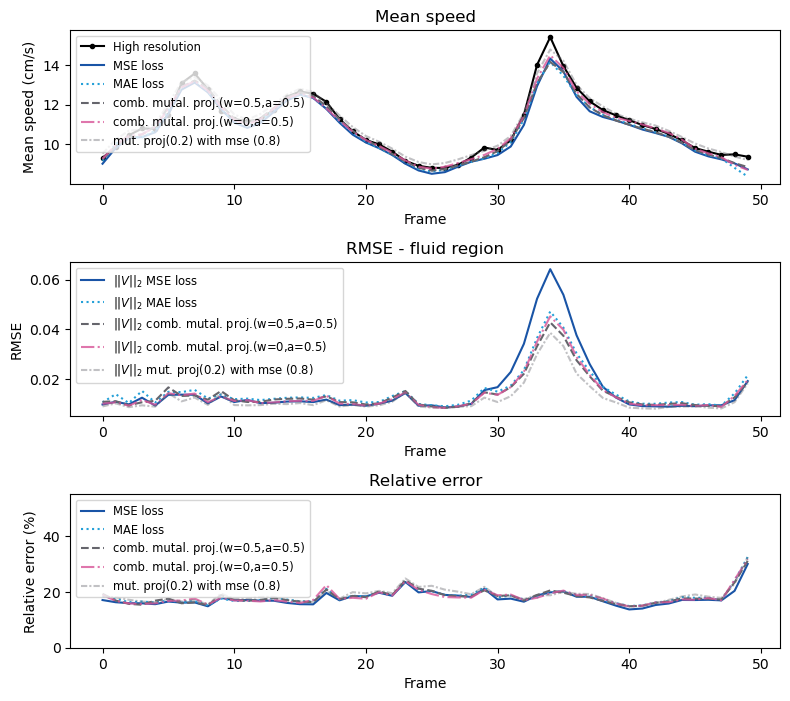

In [ ]:
set_names = [set_name for _ in range(len(model_names))]
colors = [KTH_colors['blue100'], KTH_colors['lightblue100'],  KTH_colors['grey100'], KTH_colors['pink80'], KTH_colors['grey40'],]#['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet', 'olivedrab', 'lightcoral', 'maroon', 'yellow', 'seagreen']
markers = ['solid', ':',  '--','-.',  (0, (3, 1, 1, 1)),'-.', ]
fig = plt.figure(figsize=(8, 9))
# compare_peak_flow_pixel(gt,lr, model_names, set_names, tabular_names, colors,'tabel',patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)
comparison_multiple_models(model_names, set_names, tabular_names, colors,'Table',markers,  use_dyn_mask)


In [ ]:
plot_abs_error(model_names, set_names, tabular_names, colors,'tabel', use_dyn_mask)
plt.legend()

### Comparison depth resnet

In [ ]:
model_names = ['20230620-0909', '20230710-1737', '20230710-1741', '20230710-1739']#['20230405-1417', '20230405-1419', '20230405-1421','20230407-2222']#['20230301-1641', '20230305-1001', '20230305-1002', '20230305-1008'] # resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = ['ResNet 8-4' , 'ResNet 4-8', 'ResNet 10-6', 'ResNet 4-2']
# colors = ['steelblue', 'darkorange', 'brown', 'orchid', 'darkviolet']
name_comparison = 'Depth_MoreEpochs'
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Depth',markers,  use_dyn_mask)

network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
idx_cube = np.index_exp[:, :, 5:50, 10:60]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=(8, 9))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=(8, 9))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=(8, 9))

# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison sampling of data

In [ ]:
# model_names = ['20230301-1641','20230301-1127'] 
# set_names = [set_name for _ in range(len(model_names))]
# labels = [f'ResNet-Cartesian_Sampling_{set_names[0]}',f'ResNet_RadialSampling_{set_names[0]}']
# # colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet'] 
# name_comparison = 'RadialSampling'

# comparison_multiple_models(model_names, set_names, labels, colors, name_comparison)

# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison Upsampling layer

In [ ]:
model_names = ['20230620-0909','20230710-1800', '20230710-1803']#['20230405-1417', '20230405-1422',  '20230405-1423',]#['20230301-1641','20230305-1107', '20230306-1120']# resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = [f'Linear', f'Nearest neigh.', f'TranspConv.']
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet'] 
name_comparison = 'upsampling_MoreEpochs'
# fig = plt.figure(figsize=(8, 9))
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Upsampling',markers,  use_dyn_mask)


network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
idx_cube = np.index_exp[:, :, 5:50, 10:70]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=( 8, 5))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=( 8, 5))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=( 8, 5))
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison, use_dyn_mask)
# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)

### Comparison architecture

In [ ]:
# model_names = ['20230405-1417', '20230404-1418', '20230407-2228', '20230407-2230', '20230407-2246', '20230711-0928']#['20230301-1641','20230301-1654', '20230301-1704'] ## resnet: Temporal4DFlowNet_20230301-1641 #
model_names = ['20230620-0909','20230710-1743', '20230710-1744','20230710-1748',  '20230710-1756','20230711-0928' ]
set_names = [set_name for _ in range(len(model_names))]
labels = [f'ResNet',   'DenseNet', 'CSPNet','Res_UNet', 'Res_Res_UNet', 'ConvLSTM']
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'lightblue', 'navy', 'coral']
name_comparison = 'Architecture_MoreEpochs'
# fig = plt.figure(figsize=(9, 10))
fig = plt.figure(figsize=(8, 9))
# comparison_multiple_models(model_names, set_names, labels, colors,'Architecture',markers,  use_dyn_mask)

network_prediction = {}
for m_name, t_name in zip(model_names, labels):
    _, _, network_prediction[t_name],_, _ = load_data(m_name, set_name, data_model, step, dynamic_mask_used = use_dyn_mask) #load data
idx_cube = np.index_exp[:, :, 5:50, 10:70]
frames = [32, 33, 34, 35, 36]
plot_slices_over_time1(gt['u'][idx_cube],lr['u'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['u'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['u'], max_v = max_v['u'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_u_test.png", figsize=(8, 8))
plot_slices_over_time1(gt['v'][idx_cube],lr['v'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['v'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['v'], max_v = max_v['v'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_v_test.png", figsize=(8, 8))
plot_slices_over_time1(gt['w'][idx_cube],lr['w'][idx_cube], temporal_mask[idx_cube], 0, [network_prediction[t_name]['w'][idx_cube] for t_name in labels], labels, frames, axis=0, idx=22,min_v = min_v['w'], max_v = max_v['w'],save_as = f"{eval_dir}/{set_name}_M{data_model}Frame_comparison_{name_comparison}_w_test.png", figsize=(8, 8))

# compare_peak_flow_pixel(gt,lr, model_names, set_names, labels, colors,name_comparison,patch_size, show_avg, show_pixel, use_dynamical_mask = use_dyn_mask)


## Cross-validation

In [ ]:
model_names = ['20230405-1417', '20230427-1204', '20230427-1207']## resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = ['TrainM2M3-ValM1', 'TrainM1M3-ValM2', 'TrainM1M2-ValM3' ] 
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet']
name_comparison = 'Static_dynamic_mask'
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison)
comparison_multiple_models(model_names, set_names, labels, colors,'CrossValidation',markers,  use_dyn_mask)


diff_RE = []
diff_mean_speed = []
diff_RMSE = []
for m_name, s_name, label, color, marker in zip(model_names, set_names, labels, colors, markers):
    lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = use_dyn_mask)
    rel_err = calculate_relative_error_normalized(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt_1["u"], gt_1["v"] , gt_1["w"], gt_1["mask"])
    mean_speed = calculate_mean_speed(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"],gt_1["mask"])
    
    diff_RE.append(rel_err)
    diff_mean_speed.append(mean_speed)
    diff_RMSE.append(calculate_rmse(prediction_1['speed'], gt_1['speed'], gt_1['mask']))

print(diff_RE[0] - diff_RE[1])
print('RE max', np.max(np.abs(diff_RE[0] - diff_RE[1])))
print('RE mean', np.mean(np.abs(diff_RE[0] - diff_RE[1])))
print('speed max', np.max(diff_mean_speed[0] - diff_mean_speed[1]))
print('speed mean', np.mean(diff_mean_speed[0] - diff_mean_speed[1]))
print(np.max(np.abs(diff_RMSE[0] - diff_RMSE[1])))
print(np.mean(np.abs(diff_RMSE[0] - diff_RMSE[1])))




Compare dynamic and static mask

In [ ]:
model_names = ['20230301-1641', '20230405-1417'] ## resnet: Temporal4DFlowNet_20230301-1641 #
set_names = [set_name for _ in range(len(model_names))]
labels = [f'Static_{set_names[0]}', f'Dynamic_{set_names[0]}']
# colors = ['steelblue','darkorange', 'brown', 'orchid', 'darkviolet']
name_comparison = 'Static_dynamic_mask'
# comparison_multiple_models(model_names, set_names, labels, colors,name_comparison)
# comparison_multiple_models(model_names, set_names, labels, colors,'Static and Dynamic Masl',markers,  use_dyn_mask)


dyn_mask_lst = [False, True]
diff_RE = []
diff_mean_speed = []
diff_RMSE = []
for m_name, s_name, label, color, marker,dyn_mask in zip(model_names, set_names, labels, colors, markers, dyn_mask_lst):
    lr_1, gt_1, prediction_1,temporal_mask_1, _ = load_data(m_name, s_name, data_model, step, dynamic_mask_used = dyn_mask)
    rel_err = calculate_relative_error_normalized(prediction_1["u"], prediction_1["v"], prediction_1["w"], gt_1["u"], gt_1["v"] , gt_1["w"], gt_1["mask"])
    mean_speed = calculate_mean_speed(prediction_1["u_fluid"], prediction_1["v_fluid"], prediction_1["w_fluid"],gt_1["mask"])
    diff_RE.append(rel_err)
    diff_mean_speed.append(mean_speed)
    diff_RMSE.append(calculate_rmse(prediction_1['speed'], gt_1['speed'], gt_1['mask']))

print(diff_RE[0] - diff_RE[1])
print('RE max', np.max(np.abs(diff_RE[0] - diff_RE[1])))
print('RE mean', np.mean(np.abs(diff_RE[0] - diff_RE[1])))
print('speed max', np.max(diff_mean_speed[0] - diff_mean_speed[1]))
print('speed mean', np.mean(diff_mean_speed[0] - diff_mean_speed[1]))
print(np.max(np.abs(diff_RMSE[0] - diff_RMSE[1])))
print(np.mean(np.abs(diff_RMSE[0] - diff_RMSE[1])))